**Title**: **Bike** **Details** **Dataset**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Questions:

1.What is the range of selling prices in the dataset?

In [8]:
price_range = df['selling_price'].max() - df['selling_price'].min()
print("Range of Selling Prices:", price_range)


Range of Selling Prices: 755000


2.What is the median selling price for bikes in the dataset?

In [9]:
median_price = df['selling_price'].median()
print("Median Selling Price:", median_price)


Median Selling Price: 45000.0


Q3.What is the most common seller type?

In [10]:
common_seller = df['seller_type'].mode()[0]
print("Most Common Seller Type:", common_seller)


Most Common Seller Type: Individual


4.How many bikes have driven more than 50,000 kilometers?

In [11]:
count_50k = (df['km_driven'] > 50000).sum()
print("Bikes with >50,000 km:", count_50k)


Bikes with >50,000 km: 170


Q5.Average km_driven value for each ownership type?

In [12]:
avg_km = df.groupby('owner')['km_driven'].mean()
print(avg_km)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Q6.Proportion of bikes from year 2015 or older?

In [13]:
prop_2015 = (df['year'] <= 2015).mean() * 100
print("Proportion of bikes from 2015 or older:", prop_2015, "%")


Proportion of bikes from 2015 or older: 56.64467483506126 %


7.What is the trend of missing values across the dataset?

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


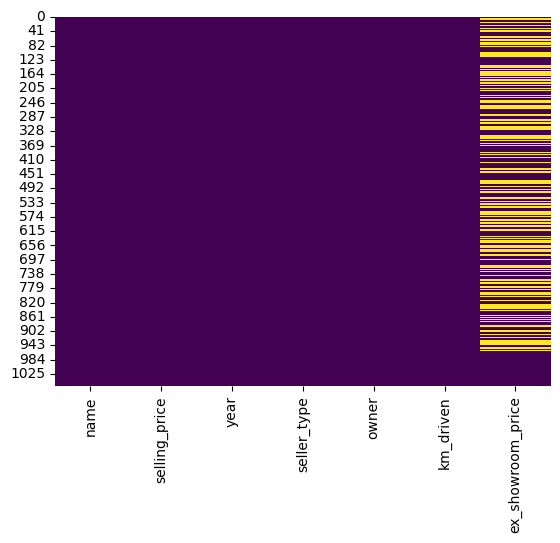

In [14]:
missing = df.isnull().sum()
print(missing)

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


8.What is the highest ex_showroom_price recorded, and for which bike?


In [15]:
idx = df['ex_showroom_price'].idxmax()
print("Bike:", df.loc[idx, 'name'])
print("Highest Ex Showroom Price:", df['ex_showroom_price'].max())


Bike: Harley-Davidson Street Bob
Highest Ex Showroom Price: 1278000.0


9.What is the total number of bikes listed by each seller type?

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


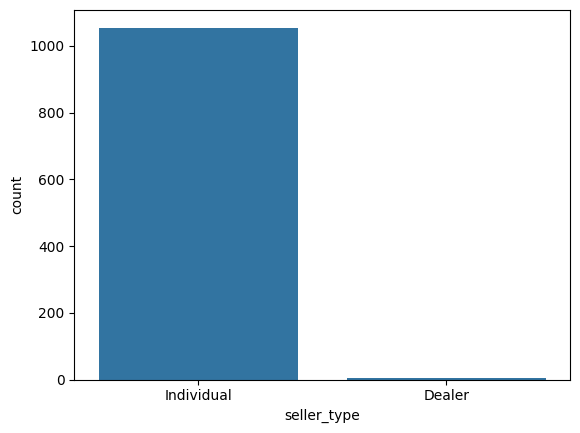

In [16]:
seller_count = df['seller_type'].value_counts()
print(seller_count)

sns.countplot(data=df, x='seller_type')
plt.show()


10.What is the relationship between selling_price and km_driven for first-owner bikes?

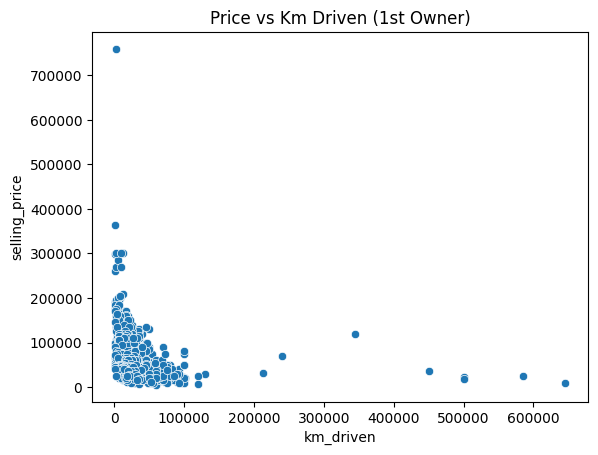

In [17]:
sns.scatterplot(data=df[df['owner']=="1st owner"],
                x="km_driven", y="selling_price")
plt.title("Price vs Km Driven (1st Owner)")
plt.show()


11.Identify and remove outliers in the km_driven column using the IQR method?

In [18]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[(df['km_driven'] >= Q1 - 1.5*IQR) &
                    (df['km_driven'] <= Q3 + 1.5*IQR)]
print("Original:", len(df), "After removing:", len(df_no_outliers))


Original: 1061 After removing: 1022


12.Perform a bivariate analysis to visualize the relationship between year and selling_price?

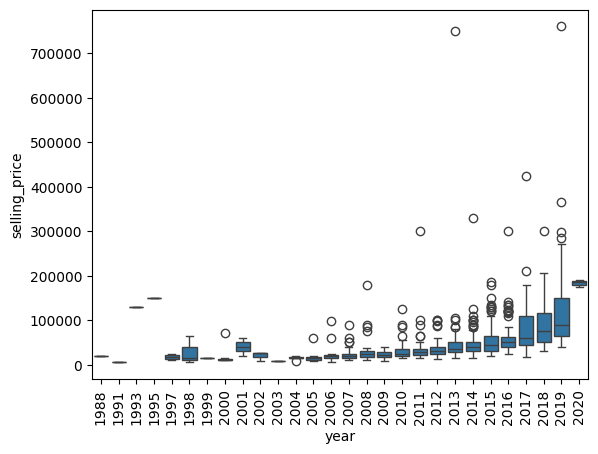

In [19]:
sns.boxplot(data=df, x="year", y="selling_price")
plt.xticks(rotation=90)
plt.show()


13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

In [20]:
from datetime import datetime
current_year = datetime.now().year
df['age'] = current_year - df['year']
df['depreciation'] = (df['ex_showroom_price'] - df['selling_price']) / df['age']

print("Average Depreciation:", df['depreciation'].mean())


Average Depreciation: 2666.561004095001


14.Which bike names are priced significantly above the average price for their manufacturing year?

In [21]:
avg_price_year = df.groupby('year')['selling_price'].mean()
above_avg_bikes = df[df.apply(lambda x: x['selling_price'] > avg_price_year[x['year']], axis=1)]
print(above_avg_bikes[['name','year','selling_price']])


                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

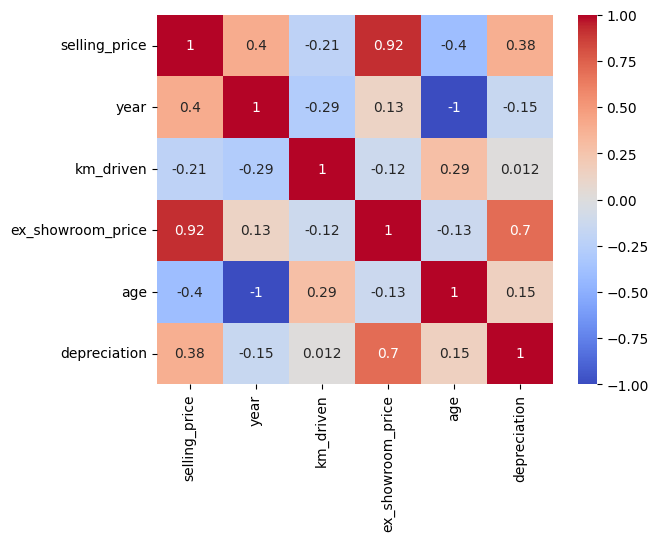

In [22]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


***EDA - 2***

***Title: Car Sale Dataset***

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_car = pd.read_csv("Car Sale.csv")
df_car.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


***Questions: ***

1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

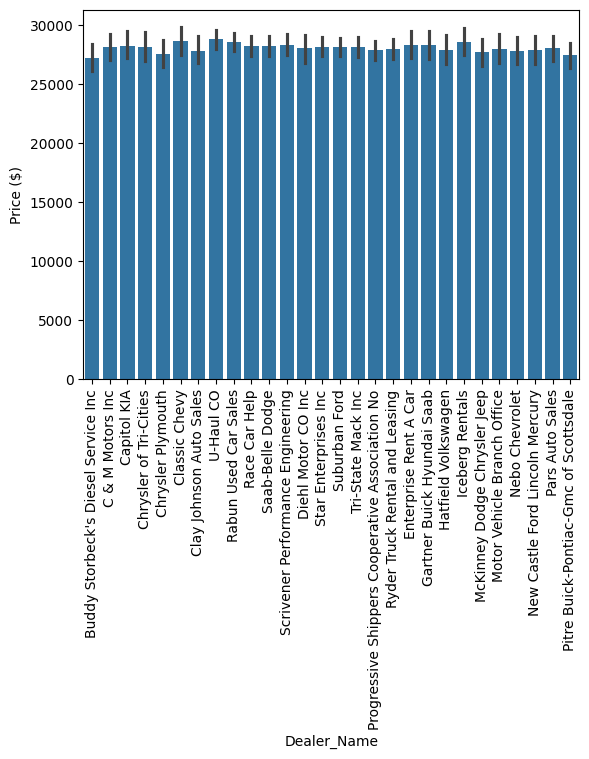

In [25]:
avg_price_dealer = df_car.groupby("Dealer_Name")["Price ($)"].mean()
print(avg_price_dealer)

sns.barplot(data=df_car, x="Dealer_Name", y="Price ($)")
plt.xticks(rotation=90)
plt.show()


2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [26]:
variation = df_car.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
print("Highest variation in prices:", variation.head(1))


Highest variation in prices: Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

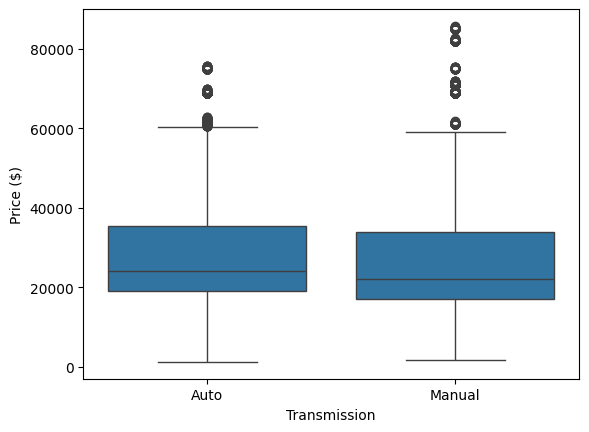

In [27]:
sns.boxplot(data=df_car, x="Transmission", y="Price ($)")
plt.show()


4.What is the distribution of car prices across different regions?

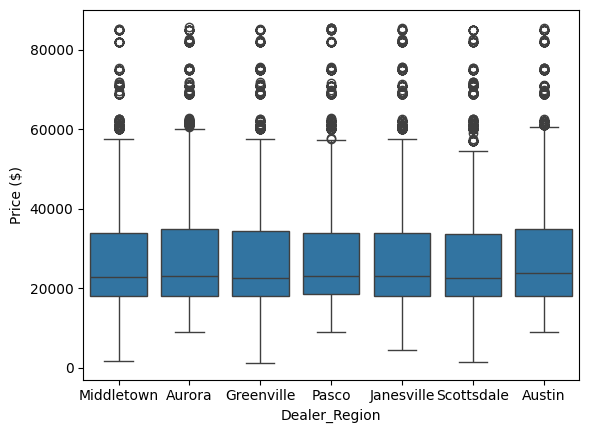

In [28]:
sns.boxplot(data=df_car, x="Dealer_Region", y="Price ($)")
plt.show()


5.What is the distribution of cars based on body styles?

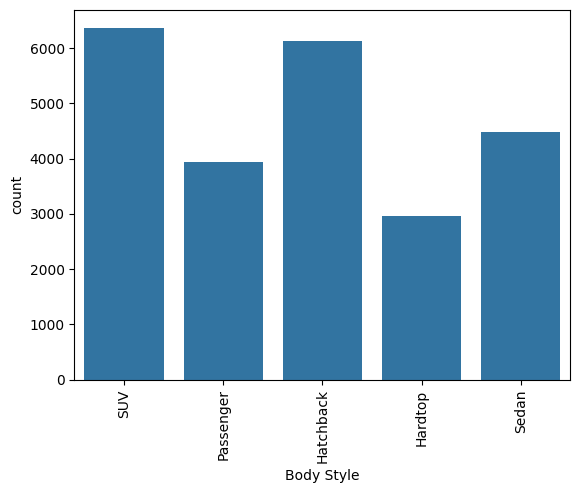

In [29]:
sns.countplot(data=df_car, x="Body Style")
plt.xticks(rotation=90)
plt.show()


6.How does the average selling price of cars vary by customer gender and annual income?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


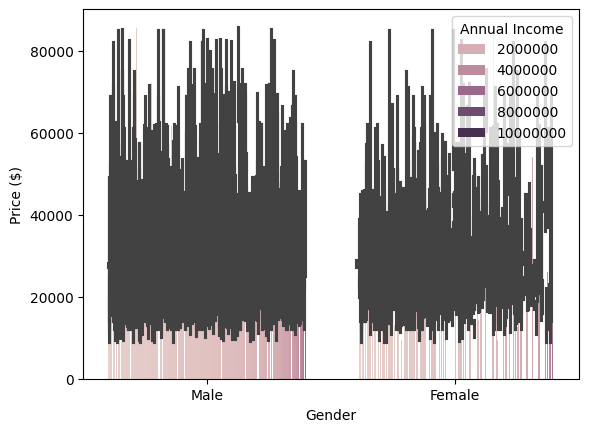

In [30]:
sns.barplot(data=df_car, x="Gender", y="Price ($)", hue="Annual Income")
plt.show()


7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

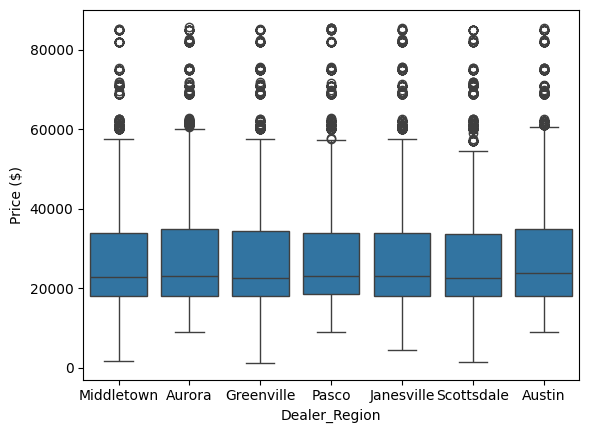

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


In [31]:
sns.boxplot(data=df_car, x="Dealer_Region", y="Price ($)")
plt.show()

region_sales = df_car['Dealer_Region'].value_counts()
print(region_sales)


8.How does the average car price differ between cars with different engine sizes?

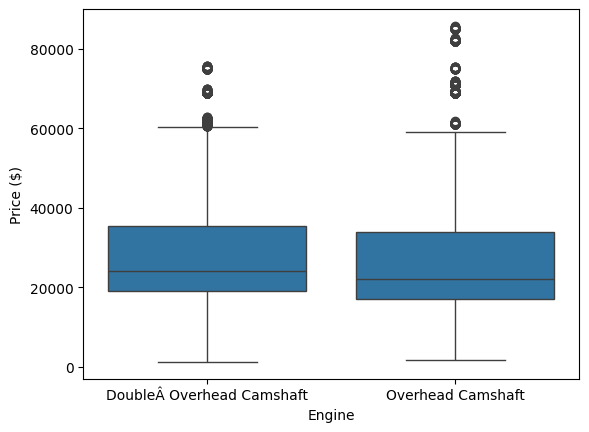

In [32]:
sns.boxplot(data=df_car, x="Engine", y="Price ($)")
plt.show()


9.How do car prices vary based on the customer’s annual income bracket?

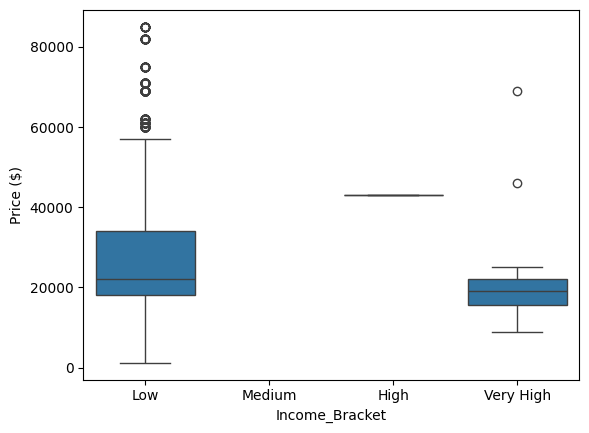

In [33]:
df_car["Income_Bracket"] = pd.cut(df_car["Annual Income"],
                                  bins=[0,30000,60000,100000,200000],
                                  labels=["Low","Medium","High","Very High"])
sns.boxplot(data=df_car, x="Income_Bracket", y="Price ($)")
plt.show()


10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

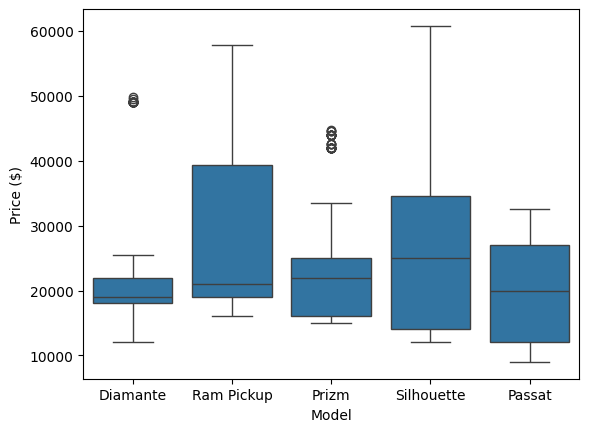

In [34]:
top_models = df_car["Model"].value_counts().head(5).index
sns.boxplot(data=df_car[df_car["Model"].isin(top_models)],
            x="Model", y="Price ($)")
plt.show()


11.How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

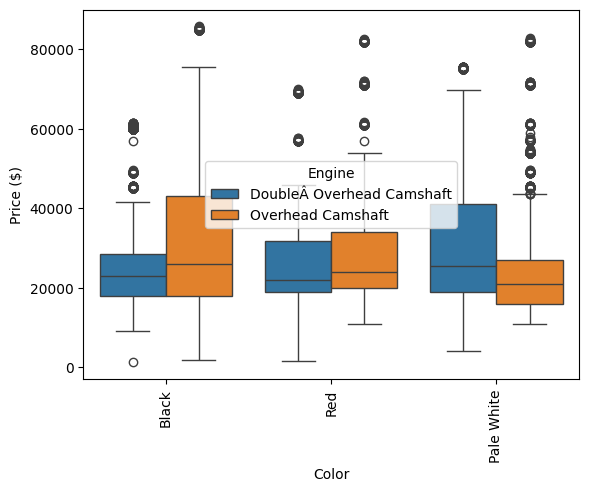

In [35]:
sns.boxplot(data=df_car, x="Color", y="Price ($)", hue="Engine")
plt.xticks(rotation=90)
plt.show()


12.Is there any seasonal trend in car sales based on the date of sale?

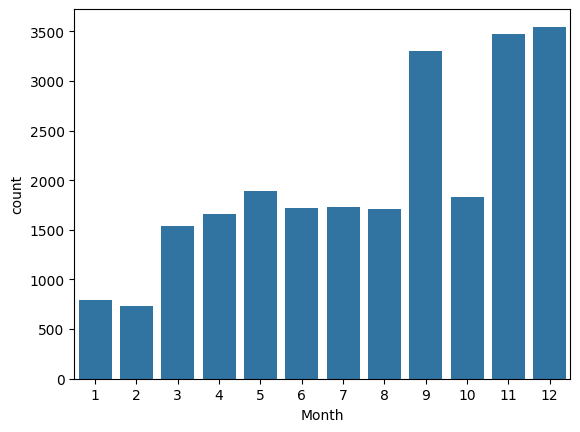

In [36]:
df_car["Date"] = pd.to_datetime(df_car["Date"])
df_car["Month"] = df_car["Date"].dt.month

sns.countplot(data=df_car, x="Month")
plt.show()


13.How does the car price distribution change when considering different combinations of body style and
transmission type?

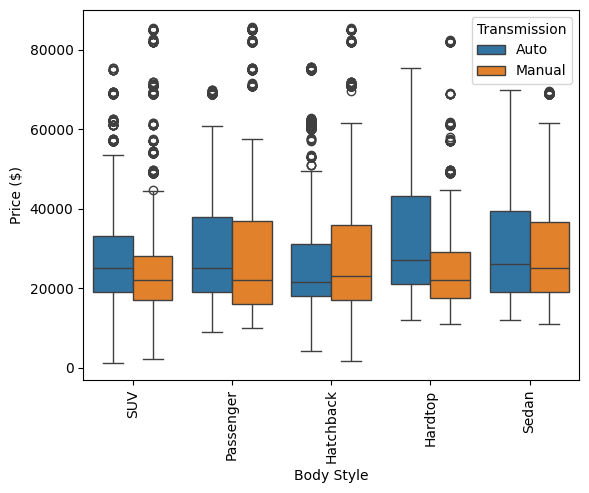

In [37]:
sns.boxplot(data=df_car, x="Body Style", y="Price ($)", hue="Transmission")
plt.xticks(rotation=90)
plt.show()


14.What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

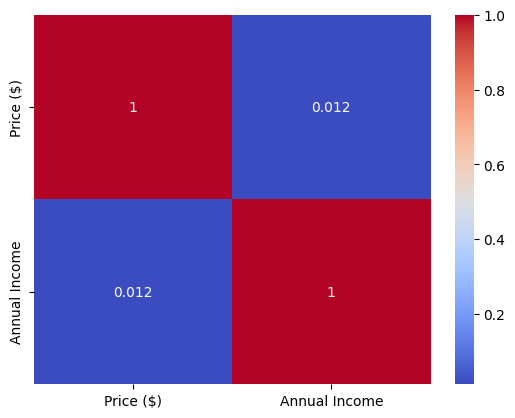

In [38]:
corr = df_car[["Price ($)", "Annual Income"]].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


15.How does the average car price vary across different car models and engine types?

In [39]:
avg_price_model_engine = df_car.groupby(["Model","Engine"])["Price ($)"].mean()
print(avg_price_model_engine)


Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


***Spotify Dataset (EDA - 4)***

***Questions:***

In [61]:
df_spotify = pd.read_csv("spotify.csv")


1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful?

In [62]:
print(df_spotify.isnull().sum())
df_spotify = df_spotify.drop_duplicates()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

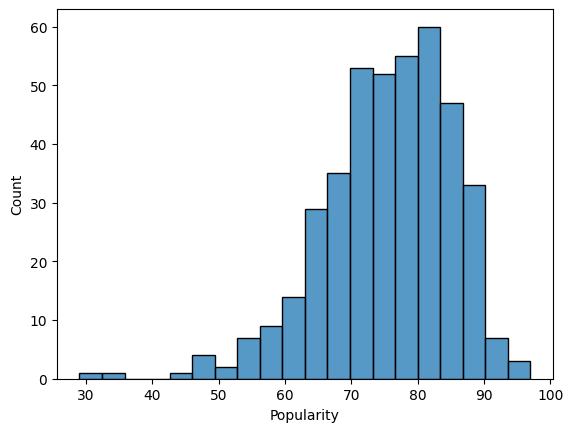

In [63]:
sns.histplot(df_spotify["Popularity"], bins=20)
plt.show()


3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

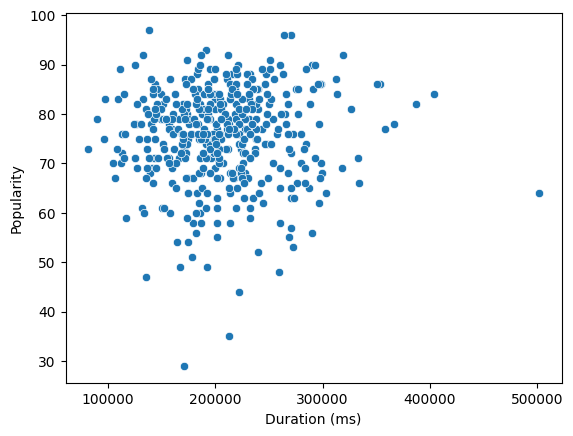

In [64]:
sns.scatterplot(data=df_spotify, x="Duration (ms)", y="Popularity")
plt.show()


4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot?

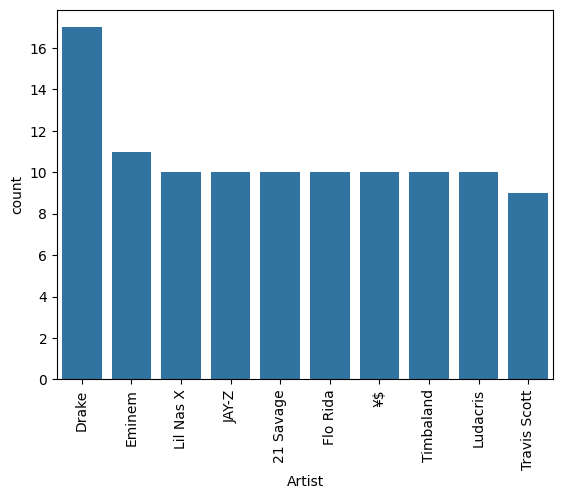

In [65]:
sns.countplot(data=df_spotify, x="Artist",
              order=df_spotify["Artist"].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.show()


5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?


In [66]:
print(df_spotify.nsmallest(5, "Popularity")[["Artist","Track Name"]])


             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist?

In [67]:
top5 = df_spotify["Artist"].value_counts().head(5).index
avg_popularity = df_spotify[df_spotify["Artist"].isin(top5)].groupby("Artist")["Popularity"].mean()
print(avg_popularity)


Artist
21 Savage    83.800000
Drake        82.882353
Eminem       83.636364
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [68]:
top_tracks = df_spotify[df_spotify["Artist"].isin(top5)].groupby("Artist")["Popularity"].idxmax()
print(df_spotify.loc[top_tracks, ["Artist","Track Name","Popularity"]])


        Artist                               Track Name  Popularity
70   21 Savage                                   redrum          96
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
100      JAY-Z                          Ni**as In Paris          86
312  Lil Nas X                        THATS WHAT I WANT          81


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?

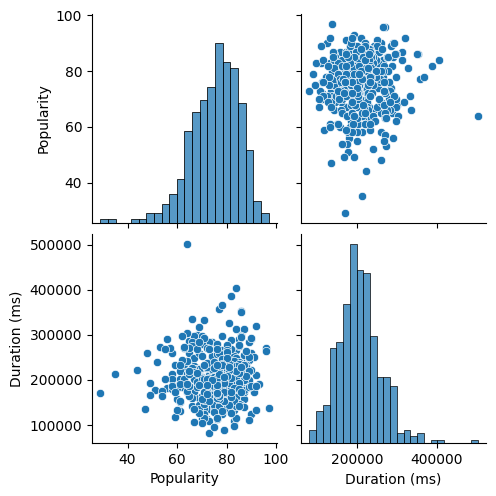

In [69]:
sns.pairplot(df_spotify[["Popularity","Duration (ms)"]])
plt.show()


9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

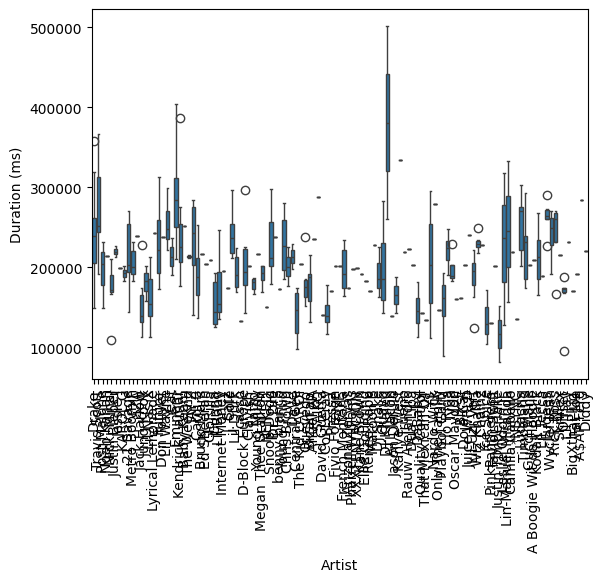

In [70]:
sns.boxplot(data=df_spotify, x="Artist", y="Duration (ms)")
plt.xticks(rotation=90)
plt.show()


10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

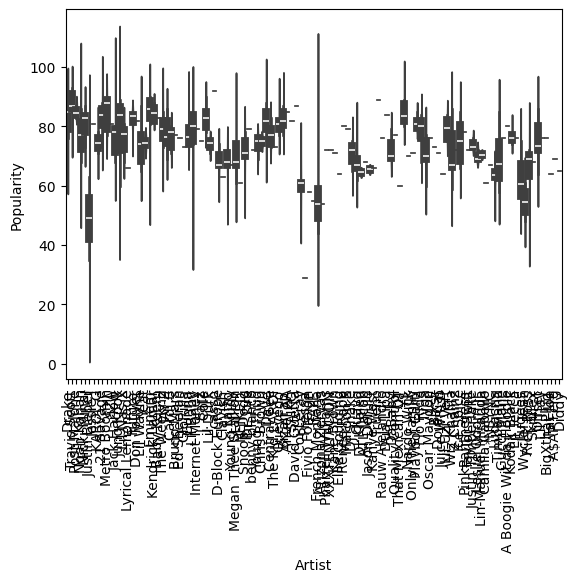

In [74]:
sns.violinplot(data=df_spotify, x="Artist", y="Popularity")
plt.xticks(rotation=90)
plt.show()
